In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure

In [2]:
def get_energy(lattice): # The energy of the state devided by J factor.
    # applies the nearest neighbors summation
    kern = generate_binary_structure(2,1) # making the kernel
    kern[1][1] = False
    
    # E/J = - sum(n.n.i&j)(sigma_i*sigma_j)
    arr = - lattice * convolve(lattice, kern, mode = 'constant', cval = 0) #畳み込み
    return arr.sum() # 和を返す

In [3]:
def Metropolis(spin_arr, times, kbT, energy, N, l): # (state, time, Boltzman factor, energy, N points, l(snapshot/time))
    
    N = int(N)
    J = 1 # Interaction coefficient
    
    spin_arr = spin_arr.copy()
    spin_arrtime = np.zeros((times+1,N,N))
    
    spin_arrtime[0] = spin_arr
    for t in range(1,times+1):
        # pick 1 random point on array and filp spin
        x = np.random.randint(0,N) # Pick the random raw from 0 to "N-1"
        y = np.random.randint(0,N) # Pick the random column from 0 to "N-1"
        spin_i = spin_arr[x,y] # picked initial spin
        spin_f = - spin_i
        
        # compute change in energy
        E_i = 0
        E_f = 0
        
        # This is the boundary conditions
        # Just taking account the spin of nearest neighbors, 
        # but when the fliped spin is on the edge, we don't have 4 negibors.
        # So applied the periodic boundary condition.
        
        # the left
        if x > 0:
            E_i += - spin_i*spin_arr[x-1, y] 
            E_f += - spin_f*spin_arr[x-1, y] #
            
            # Periodic boundary condtion
        elif x == 0:
            E_i += - spin_i*spin_arr[N-1, y]
            E_f += - spin_f*spin_arr[N-1, y]
            
            
        # the right
        if x < N-1:
            E_i += - spin_i*spin_arr[x+1, y]  #
            E_f += - spin_f*spin_arr[x+1, y]  #
            
            # Periodic boundary condtion
        elif x == N-1:
            E_i += - spin_i*spin_arr[0, y]
            E_f += - spin_f*spin_arr[0, y]
            
            
        # the below
        if y > 0:
            E_i += - spin_i*spin_arr[x, y-1]  #
            E_f += - spin_f*spin_arr[x, y-1]  #
        
         # Periodic boundary condtion
        elif y == 0:
            E_i += - spin_i*spin_arr[x, N-1]
            E_f += - spin_f*spin_arr[x, N-1]
        
        # the above
        if y < N-1:
            E_i += - spin_i*spin_arr[x, y+1]  #
            E_f += - spin_f*spin_arr[x, y+1]  #
            
        # Periodic boundary condtion
        elif y == N-1:
            E_i += - spin_i*spin_arr[x, 0]
            E_f += - spin_f*spin_arr[x, 0]
            
        #change state with designated probabilities
        dE = E_f - E_i
        
        # probabilistic simulation of fliping the neigbhors
        
        # E_f > E_i pattern
        # They might be fliped, might not,following the detailed balance equation
        if (dE > 0) * (np.random.random() < np.exp(-J/kbT*dE)): # (A * B) means (A and B)
            spin_arr[x,y] = spin_f
            
        # E_i >= E_f pattern
        # Definite flip
        elif dE <= 0:
            spin_arr[x,y] = spin_f
        
        if t%l == 0:
            spin_arrtime[t] = spin_arr 

    return spin_arrtime

In [4]:
# N by N grid
N = 150

In [5]:
# Generate N by N array for a random initial state
init_random = np.random.random((N,N))
lattice_init = np.zeros((N,N))

# Change the all components to 1 or -1
#a = np.random.random()
a = 0.6
lattice_init[init_random>=a] = 1 # (1-a)*100% is up, a is also random.
lattice_init[init_random<a] = -1 # a% is down

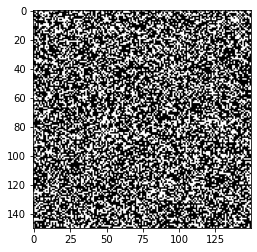

In [6]:
plt.imshow(lattice_init, cmap='gray', vmin = -1, vmax = 1) # A random initial state

In [7]:
# Execute the ising program
l = 10 # snapshot/time
times = l*100000
#kbT = 0.0000001
kbT = 1000

Isingarrays = Metropolis(lattice_init, times, kbT, get_energy(lattice_init), N, l)

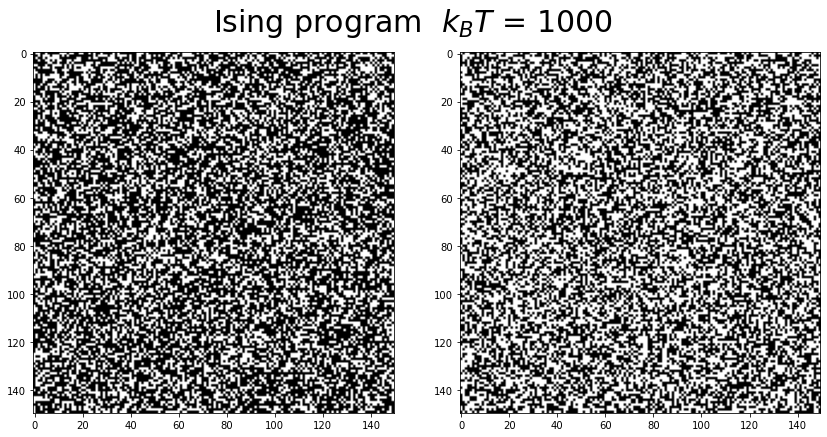

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax[0].imshow(Isingarrays[0], cmap='gray', vmin = -1, vmax = 1)
ax[1].imshow(Isingarrays[times], cmap='gray', vmin = -1, vmax = 1)
        
fig.suptitle(r'Ising program  $k_{B}T$ = '+f'{kbT} ', size = 30)
fig.tight_layout()     